![# SNF Grupo de Estudos em Ciência de Dados](https://raw.githubusercontent.com/henriquepgomide/snf-grupo-de-estudos/master/assets/imgs/snl.jpeg)


# PyCaret - Aprendizagem de Máquinas para profissionais com prazo
4 de Julho de 2020 

Henrique Gomide






## 0.0 - Introdução

Olá! Nosso objetivo hoje será apresentar a biblioteca PyCaret, que facilita a 
implementação de modelos de aprendizagem de máquinas

1.   Apresentar biblioteca PyCaret
2.   Instalar PyCaret
3.   Processar dados
4.   Treinar modelos
5.   Comparar resultados dos modelos
6.   Conclusões


### Banco de dados

Iremos usar o banco de dados 'insurance' para treinar nosso modelo. Você
encontra o banco neste link: 

* https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv

#### Descrição do banco de dados

* age...........Idade em anos
* sex...........Sexo
* bmi...........Índice de Massa Corporal
* children ...Número de crianças 
* smoker.....Se é fumante
* region.......Região dos Estados Unidos
* charges....Sinistro em unidade monetária

## 1.0 - PyCaret, o que é?


PyCaret é uma biblioteca de código aberto e que necessita pouco código de programação para preparar seus dados e desenvolver seu modelo de aprendizagem de máquinas no seu ambiente de preferência. Ela funciona até no PowerBI :)

Para maiores detalhes, consultar o [site oficial](https://pycaret.org/). 

### Vantagens

* Pouco código para implementar algoritmos de aprendizagem supervisionada e não
supervisionada.
* Algoritmos atuais já estão incluídos (e.g., lightGBM)

### Desvantagens

* Documentação incompleta
* Filosofia baterias incluídas carregará pacotes desnecessários

## 2.0 - Instalar PyCaret

Dica: Lembre-se de usar um ambiente virtual. Versão do Python suportada oficialmente 3.6.

In [ ]:
# Instalar PyCaret
!pip install pycaret

In [ ]:
# Carregar bibliotecas
import pycaret
import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## 3.0 Processar dados


1.   Carregar dados
2.   Separar dados para treino e teste.

In [ ]:
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv'
df = pd.read_csv(URL)
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Separar banco de dados
train, validation = train_test_split(df, test_size=0.2,
                                     random_state=42)

In [ ]:
# Regressão ou classificação?
# Documentação SETUP https://pycaret.org/setup/
# Documentação para método setup regression 
#     https://pycaret.org/regression/

reg = setup(data = train, 
              target = 'charges', 
              train_size = 0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1497
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1070, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 4.0 Treinar e Comparar Modelos

Vamos olhar a documentação, antes de iniciar o treino.


```
compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)
```

Documentação: https://pycaret.org/regression/ 

In [ ]:
# Treinar modelos
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2737.482000,23545768.672700,4664.293200,0.830200,0.459000,0.337400
1,Gradient Boosting Regressor,2763.694900,24424209.541800,4777.179600,0.822800,0.464900,0.337900
2,CatBoost Regressor,2880.673200,25743500.708900,4931.286400,0.813900,0.495400,0.361800
3,Light Gradient Boosting Machine,3092.371300,26013781.667300,4978.275100,0.811600,0.570600,0.406100
4,Random Forest,2921.033400,27081072.479800,5070.621000,0.803100,0.503400,0.375700
5,Extra Trees Regressor,2822.185900,28788824.063100,5255.694800,0.789900,0.490100,0.337800
6,AdaBoost Regressor,4459.482100,31645074.871100,5581.770800,0.763800,0.648400,0.763000
7,Lasso Least Angle Regression,4262.525700,39127303.324600,6174.661800,0.714100,0.576400,0.428800
8,Ridge Regression,4284.677400,39205405.494700,6181.421200,0.713700,0.568100,0.432100
9,Bayesian Ridge,4282.700200,39214586.466300,6182.212500,0.713600,0.566400,0.431700


In [ ]:
# Avaliar Treino
tuned_xgboost = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2562.4732,1.314637e+07,3625.7925,0.8835,0.3676,0.3094
1,2336.4914,1.122015e+07,3349.6498,0.8795,0.4450,0.3901
2,2777.4893,1.918018e+07,4379.5181,0.8472,0.5023,0.4377
3,3168.6684,3.177904e+07,5637.2899,0.7944,0.4027,0.3141
4,2650.2023,1.583376e+07,3979.1651,0.9011,0.3914,0.3194
5,3789.7470,4.358527e+07,6601.9144,0.7232,0.5656,0.3325
6,3154.2261,2.971892e+07,5451.5063,0.7889,0.5769,0.3434
7,2533.3419,1.984561e+07,4454.8416,0.8294,0.5159,0.4255
8,3341.0661,2.819173e+07,5309.5885,0.8379,0.6185,0.4204
9,3943.6930,4.333480e+07,6582.9175,0.6676,0.5242,0.3954


In [ ]:
# Criar Modelo
xgboost_tuned = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1689.3390,4.774065e+06,2184.9633,0.9577,0.3900,0.2907
1,2269.9780,1.201543e+07,3466.3283,0.8710,0.4422,0.3775
2,2520.4292,1.802685e+07,4245.8034,0.8564,0.4373,0.3590
3,3290.3414,3.391437e+07,5823.6042,0.7806,0.4058,0.3153
4,2064.0934,1.109589e+07,3331.0487,0.9307,0.3668,0.3013
5,3707.8324,4.353980e+07,6598.4697,0.7235,0.5438,0.3158
6,3029.1924,2.764045e+07,5257.4184,0.8037,0.5379,0.3631
7,2731.2488,2.032967e+07,4508.8432,0.8253,0.4676,0.3911
8,2549.8133,2.371760e+07,4870.0718,0.8636,0.5023,0.3097
9,3522.5523,4.040358e+07,6356.3807,0.6901,0.4965,0.3503


In [ ]:
# Ver parâmetros do melhor modelo
print(xgboost_tuned)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1497,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [ ]:
# Avaliar parâmetros
plot_model(xgboost_tuned, plot='parameter')

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
importance_type,gain
learning_rate,0.1
max_delta_step,0
max_depth,3


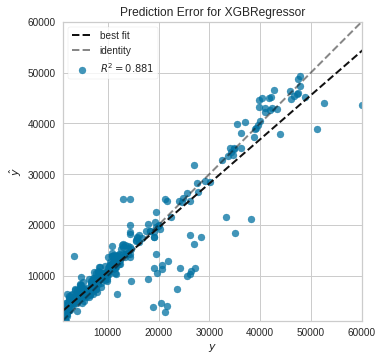

In [ ]:
# Comparar predições e resultados do banco de teste
plot_model(xgboost_tuned, plot='error')

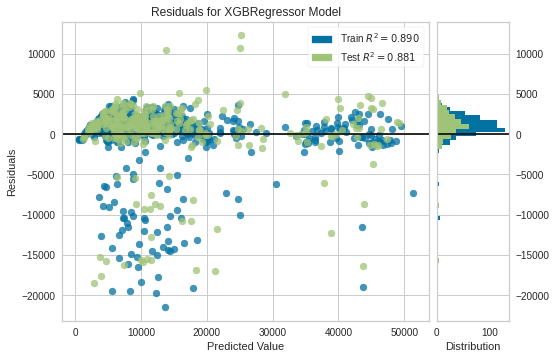

In [ ]:
# Comparar os resíduos
plot_model(xgboost_tuned, plot='residuals')

In [ ]:
evaluate_model(xgboost_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Interpretar o Modelo
interpret_model(xgboost_tuned)
# Damm...

AssertionError: ignored

In [ ]:
xgboost_tuned_holdout = predict_model(xgboost_tuned, data=validation)

In [ ]:
print(xgboost_tuned_holdout)

     age     sex     bmi  children smoker     region      charges         Label
0     45  female  25.175         2     no  northeast   9095.06825  11932.020508
1     36  female  30.020         0     no  northwest   5272.17580   5986.300293
2     64  female  26.885         0    yes  northwest  29330.98315  32360.863281
3     46    male  25.745         3     no  northwest   9301.89355   9798.136719
4     19    male  31.920         0    yes  northwest  33750.29180  34247.140625
..   ...     ...     ...       ...    ...        ...          ...           ...
263   63    male  35.090         0    yes  southeast  47055.53210  45128.562500
264   58  female  27.170         0     no  northwest  12222.89830  12296.059570
265   38    male  28.025         1     no  northeast   6067.12675   7015.959961
266   54  female  47.410         0    yes  southeast  63770.42801  46644.394531
267   51  female  34.200         1     no  southwest   9872.70100  10361.451172

[268 rows x 8 columns]


In [ ]:
# Finalize model
final_xgboost_tuned = finalize_model(xgboost_tuned)

In [ ]:
# Save Model
save_model(final_xgboost_tuned, 'snf_saved_04072020')

Transformation Pipeline and Model Succesfully Saved


## 5.0 Conclusões

* PyCaret oferece um rápido caminho para desenvolvimento de protótipos
* No entanto, não substituí as implementações scikit.learn, numpy e pandas.

### Happy Saturday Night Fever!

![alt text](https://raw.githubusercontent.com/henriquepgomide/snf-grupo-de-estudos/master/assets/imgs/Saturday%20Night%20Fever.jpeg)